In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

%matplotlib inline

In [2]:
#nltk.download('punkt')

In [3]:
data = pd.read_csv("output_merged_25oct.csv", encoding='latin-1')
data.head()

,COMPANY,COUNTRY,DISTRIBUTOR,ARTICLE ID,MODEL NUMBER,ARTICLE NAME,SUBBRAND,SPORTS CATEGORY,PRODUCT DIVISION,PRODUCT GROUP,...,CURRENT PRICE IN EUR,INITIAL PRICE IN SELECTED CURRENCY,CURRENT PRICE IN SELECTED CURRENCY,SELECTED CURRENCY,PRODUCT INTRODUCTION DATE,DISCOUNTED SINCE,PRODUCT EXIT DATE,PRODUCT DESCRIPTION,PRODUCT URL,IMAGE-SERVER URL
0,Nike,USA,Own eCom,837786-603,837786,KD 8 'Aunt Pearl' Premium Big Kids' Basketball...,Performance,Basketball,Footwear,Performance Footwear,...,56.5239,121.80,56.5239,EUR,2/29/2016,11/9/2016,9/18/2017,DYNAMIC VERSATILITY. INSPIRED STYLE.; The KD 8...,https://store.nike.com/us/en_us/pd/kd-8-aunt-p...,http://usporamap287.am.adsint.biz/zoomimages/1...
1,Nike,USA,Own eCom,810455-421,810455,LeBron 13 Transportation Kids' Adjustable Hat,Sport Inspired,Lifestyle,Accessories,Headwear,...,17.3739,24.36,17.3739,EUR,2/29/2016,4/4/2016,5/2/2016,LEBRON TRANSPORTATION HAT The LeBron 13 Transp...,http://store.nike.com/us/en_us/pd/lebron-13-tr...,http://usporamap287.am.adsint.biz/zoomimages/1...
2,Nike,USA,Own eCom,807940-010,807940,Nike SB Cherry Blossom Perforated Trucker Hat,Sport Inspired,Skate,Accessories,Headwear,...,27.8400,27.84,27.8400,EUR,2/29/2016,Not discounted yet,3/21/2016,BREATHABLE COMFORT The Nike SB Cherry Blossom ...,http://store.nike.com/us/en_us/pd/sb-cherry-bl...,http://usporamap287.am.adsint.biz/zoomimages/1...
3,Nike,USA,Own eCom,749502-100,749502,Nike Cortez Big Kids' Shoe,Sport Inspired,Lifestyle,Footwear,Sport Inspired Footwear,...,39.1239,52.20,39.1239,EUR,2/29/2016,2/9/2017,4/10/2017,"A CLASSIC, REBORN. The Nike Cortez BigÂ Kids' ...",http://store.nike.com/us/en_us/pd/cortez-big-k...,http://usporamap287.am.adsint.biz/zoomimages/1...
4,Nike,USA,Own eCom,746735-404,746735,Nike Golf AW84 OX Adjustable Hat,Performance,Golf,Accessories,Headwear,...,17.3739,20.88,17.3739,EUR,2/29/2016,6/30/2016,10/10/2016,PREMIUM LOOK. LIGHTWEIGHT FIT. The Nike Golf A...,http://store.nike.com/us/en_us/pd/golf-aw84-ox...,http://usporamap287.am.adsint.biz/zoomimages/1...


In [4]:
data.isnull().sum()

COMPANY                                    0
COUNTRY                                    0
DISTRIBUTOR                                0
ARTICLE ID                                 0
MODEL NUMBER                               0
ARTICLE NAME                              19
SUBBRAND                                   0
SPORTS CATEGORY                            0
PRODUCT DIVISION                           0
PRODUCT GROUP                              0
PRODUCT TYPE                               0
FRANCHISE                                 20
TECHNOLOGIES                          146388
COLOUR GROUP                               0
COLOUR                                  7285
GENDER                                     0
AGE GROUP                                  0
CONSUMER RATING                            0
INITIAL PRICE IN LOCAL CURRENCY            0
CURRENT PRICE IN LOCAL CURRENCY            0
LOCAL CURRENCY                             0
INITIAL PRICE IN EUR                       0
CURRENT PR

In [5]:
data.COUNTRY.unique()

array(['USA', 'Germany', 'Japan'], dtype=object)

In [6]:
data.SUBBRAND.unique()

array(['Performance', 'Sport Inspired'], dtype=object)

In [7]:
# Filtering US and UK
#data = data.loc[data["language"].isin(['de-DE'])]

In [8]:
#data.group.unique()

In [9]:
data_req = data.loc[:,["COMPANY", "COUNTRY", "ARTICLE NAME", "SPORTS CATEGORY", "PRODUCT DESCRIPTION", "PRODUCT URL"]]

In [10]:
data_req = data_req.drop_duplicates()

In [11]:
len(data_req)

268679

In [12]:
data_req_x = data_req.loc[:,["COMPANY", "COUNTRY", "ARTICLE NAME", "PRODUCT DESCRIPTION", "PRODUCT URL"]]
data_req_y = data_req.loc[:, ["SPORTS CATEGORY"]]

In [13]:
data_req_x = data_req_x.fillna("unknown")
data_req = pd.concat([data_req_x, data_req_y], axis=1)

In [14]:
len(data_req)

268679

In [15]:
data_req = data_req.dropna()

In [16]:
data_req = data_req.drop_duplicates()

In [17]:
data_req["description"]  = data_req["COMPANY"] +" " + data_req["COUNTRY"] +" " + data_req["ARTICLE NAME"] +" " + data_req["PRODUCT DESCRIPTION"]+" " + data_req["PRODUCT URL"]

In [18]:
data_req = data_req.drop(["COMPANY", "COUNTRY", "ARTICLE NAME", "PRODUCT DESCRIPTION", "PRODUCT URL"], axis = 1)

In [19]:
data_req.columns = ["subBrand", "description"]

In [20]:
data_req.subBrand.unique()

array(['Basketball', 'Lifestyle', 'Skate', 'Golf', 'Training',
       'American Football', 'Running', 'Football', 'Tennis', 'Baseball',
       'Track & Field', 'Swim', 'Lacrosse', 'Yoga', 'Snowboard',
       'Volleyball', 'Table Tennis', 'Rugby', 'Ice Hockey', 'Hockey',
       'Softball', 'Surf', 'Boxing', 'Outdoor', 'Cycling', 'Driving',
       'Handball', 'Weight Lifting', 'Martial Arts', 'Indoor', 'Cricket',
       'Gymnastics'], dtype=object)

In [21]:
len(data_req)

268679

In [22]:
data_req = data_req.drop_duplicates()

In [23]:
data_req.subBrand = data_req.subBrand.str.lower()
data_req.description = data_req.description.str.lower()

In [24]:
data_req.subBrand.unique()

array(['basketball', 'lifestyle', 'skate', 'golf', 'training',
       'american football', 'running', 'football', 'tennis', 'baseball',
       'track & field', 'swim', 'lacrosse', 'yoga', 'snowboard',
       'volleyball', 'table tennis', 'rugby', 'ice hockey', 'hockey',
       'softball', 'surf', 'boxing', 'outdoor', 'cycling', 'driving',
       'handball', 'weight lifting', 'martial arts', 'indoor', 'cricket',
       'gymnastics'], dtype=object)

In [25]:
lens = data_req.description.str.len()
lens.mean(), lens.std(), lens.max()

(680.0890318930768, 432.91020083794467, 6086)

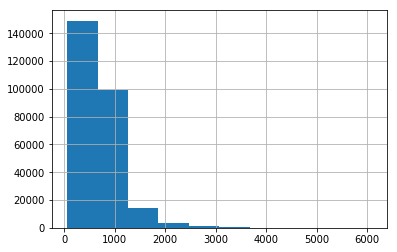

In [26]:
lens.hist();

In [27]:
data_req = data_req.dropna()

In [28]:
len(data_req)

268679

In [29]:
one_hot = pd.get_dummies(data_req.subBrand)

In [30]:
label_cols = data_req.subBrand.dropna().unique()

In [31]:
label_cols

array(['basketball', 'lifestyle', 'skate', 'golf', 'training',
       'american football', 'running', 'football', 'tennis', 'baseball',
       'track & field', 'swim', 'lacrosse', 'yoga', 'snowboard',
       'volleyball', 'table tennis', 'rugby', 'ice hockey', 'hockey',
       'softball', 'surf', 'boxing', 'outdoor', 'cycling', 'driving',
       'handball', 'weight lifting', 'martial arts', 'indoor', 'cricket',
       'gymnastics'], dtype=object)

In [32]:
minCount = 10
subBrand_minCount = pd.DataFrame((data_req.subBrand.value_counts() > minCount).reset_index())

In [33]:
subBrand_drop = subBrand_minCount.loc[subBrand_minCount["subBrand"] == False]

In [34]:
subBrand_drop

,index,subBrand
30,table tennis,False
31,gymnastics,False


In [36]:
data_req.subBrand.value_counts()

lifestyle            97109
training             53356
running              35874
football             26840
basketball           13809
golf                 11733
american football     7936
skate                 5305
tennis                4879
baseball              2854
outdoor               2078
swim                  1695
driving               1059
yoga                   985
hockey                 564
rugby                  389
ice hockey             327
track & field          325
lacrosse               304
martial arts           303
snowboard              277
volleyball             167
cycling                143
handball                79
boxing                  74
weight lifting          56
softball                53
indoor                  37
surf                    36
cricket                 25
table tennis             7
gymnastics               1
Name: subBrand, dtype: int64

In [37]:
label_cols = np.setdiff1d(label_cols, subBrand_drop["index"])

In [38]:
data_req = pd.concat([data_req, one_hot], axis=1)

In [39]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [40]:
description = "description"

In [41]:
data_req = data_req.drop(subBrand_drop["index"], axis = 1)

In [42]:
np.random.seed(123)
data_req_sample = data_req.sample(frac=0.7)

In [43]:
train = data_req.loc[data_req.index.isin(data_req_sample.index)]
test = data_req.loc[~data_req.index.isin(data_req_sample.index)]

In [44]:
test_subBrand = test.subBrand

In [45]:
#test_subBrand

In [46]:
train = train.drop("subBrand", axis = 1)
test = test.drop("subBrand", axis = 1)

In [47]:
# token_dict = {}
# stemmer = PorterStemmer()

# def stem_tokens(tokens, stemmer):
#     stemmed = []
#     for item in tokens:
#         stemmed.append(stemmer.stem(item))
#     return stemmed

# def tokenize(text):
#     tokens = nltk.word_tokenize(text)
#     stems = stem_tokens(tokens, stemmer)
#     return stems

In [48]:
# from stop_words import get_stop_words
# stop_words_english = get_stop_words('english')
# stop_words_german = get_stop_words('german')

In [49]:
#stop_words_english.append(stop_words_german)

In [50]:
# stop_words_english = sorted(set(map(tuple, stop_words_english)), reverse=True)

In [51]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1, stop_words = None )
trn_term_doc = vec.fit_transform(train[description])
test_term_doc = vec.transform(test[description])

In [52]:
trn_term_doc, test_term_doc

(<188075x636882 sparse matrix of type '<class 'numpy.float64'>'
 	with 34461604 stored elements in Compressed Sparse Row format>,
 <80604x636882 sparse matrix of type '<class 'numpy.float64'>'
 	with 14586237 stored elements in Compressed Sparse Row format>)

In [53]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [54]:
x = trn_term_doc
test_x = test_term_doc

In [55]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit american football
fit baseball
fit basketball
fit boxing
fit cricket
fit cycling
fit driving
fit football
fit golf
fit handball
fit hockey
fit ice hockey
fit indoor
fit lacrosse
fit lifestyle
fit martial arts
fit outdoor
fit rugby
fit running
fit skate
fit snowboard
fit softball
fit surf
fit swim
fit tennis
fit track & field
fit training
fit volleyball
fit weight lifting
fit yoga


In [58]:
preds.shape

(80604, 30)

In [59]:
predictions = pd.DataFrame(preds, columns = label_cols)

In [60]:
test.index = np.arange(0, len(test))
test_subBrand.index = np.arange(0, len(test))

In [61]:
len(test)

80604

In [62]:
submid = pd.DataFrame({'description': test["description"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = label_cols)], axis=1)

In [63]:
submission.head()

,description,american football,baseball,basketball,boxing,cricket,cycling,driving,football,golf,...,snowboard,softball,surf,swim,tennis,track & field,training,volleyball,weight lifting,yoga
0,"nike usa nike cortez big kids' shoe a classic,...",0.000158,0.000132,0.002037,0.000017,0.000011,0.000019,0.000032,0.000842,0.000168,...,0.000041,0.000016,0.000011,0.000078,0.000135,0.000027,0.002272,0.000018,0.000013,0.000065
1,nike germany nike performance low-cut socken f...,0.000267,0.000074,0.001738,0.000021,0.000011,0.000047,0.000030,0.012270,0.003241,...,0.000029,0.000013,0.000011,0.000134,0.000413,0.000033,0.799270,0.000026,0.000017,0.000095
2,nike usa nike jr. tiempo legend vi tf kids' tu...,0.000595,0.000235,0.000489,0.000018,0.000012,0.000020,0.000039,0.999770,0.000278,...,0.000042,0.000019,0.000012,0.000107,0.000189,0.000028,0.000632,0.000021,0.000017,0.000063
3,nike usa nike mercurial victory v tf kids' tur...,0.001069,0.000314,0.000210,0.000019,0.000014,0.000021,0.000029,0.999984,0.000371,...,0.000041,0.000026,0.000014,0.000105,0.000266,0.000033,0.000053,0.000021,0.000016,0.000067
4,nike usa nike jr. mercurial victory v ic kids'...,0.000518,0.000151,0.000777,0.000021,0.000012,0.000020,0.000026,0.999443,0.000566,...,0.000036,0.000019,0.000013,0.000118,0.000200,0.000030,0.000520,0.000030,0.000016,0.000062


In [64]:
final_pred = pd.concat([submission, test_subBrand.str.lower()],axis = 1)

In [65]:
test_subBrand.str.lower().value_counts()

lifestyle            29171
training             15975
running              10842
football              8012
basketball            4231
golf                  3444
american football     2389
skate                 1584
tennis                1421
baseball               863
outdoor                621
swim                   485
yoga                   297
driving                293
hockey                 165
rugby                  131
ice hockey             105
snowboard               96
track & field           95
martial arts            91
lacrosse                87
volleyball              55
cycling                 39
weight lifting          24
boxing                  24
handball                23
softball                15
surf                    11
cricket                  7
indoor                   6
table tennis             2
Name: subBrand, dtype: int64

In [66]:
final_pred["Predictions"] = final_pred[label_cols].idxmax(axis = 1)

In [67]:
from mlxtend.evaluate import confusion_matrix

y_target =    final_pred.subBrand
y_predicted = final_pred.Predictions

cm = confusion_matrix(y_target=y_target, 
                      y_predicted=y_predicted, 
                      binary=False)

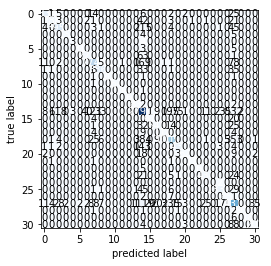

In [68]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [69]:
print(f'Accuracy Score : {accuracy_score(final_pred.subBrand, final_pred.Predictions)}')
print(f'F1 Score: {f1_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Precision: {precision_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Recall: {recall_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')

Accuracy Score : 0.9378690883827105


C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score: 0.8540055066545588


C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision: 0.897360446671306
Recall: 0.8208736003185043


In [88]:
#final_pred.to_csv("final_output_SubBrand_v4.csv", index_label=False, index=False)

In [83]:
len(final_pred)

20860

In [51]:
#test_subBrand

In [52]:
len(submission)

15062

In [54]:
#final_pred.isnull().sum()